WARNING  models/modelbest.pt appears to require 'dill', which is not in ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ---------------------------------------- 116.3/116.3 kB 1.7 MB/s eta 0:00:00

requirements: AutoUpdate success  3.4s, installed 1 package: ['dill']
requirements:  Restart runtime or rerun command for updates to take effect



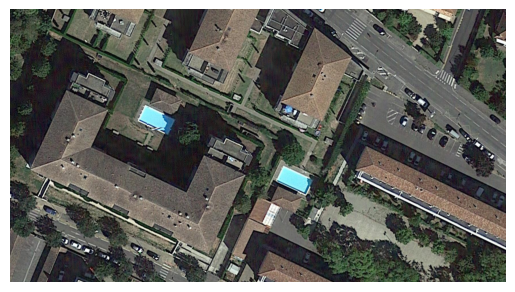


image 1/1 c:\Users\Melody\Documents\GitHub\BTV\images\pool1.png: 352x640 3 pools, 177.0ms
Speed: 3.0ms preprocess, 177.0ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)


In [1]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

model = YOLO('models/modelbest.pt')

image_path = 'images/pool1.png'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

results = model.predict(image_path)

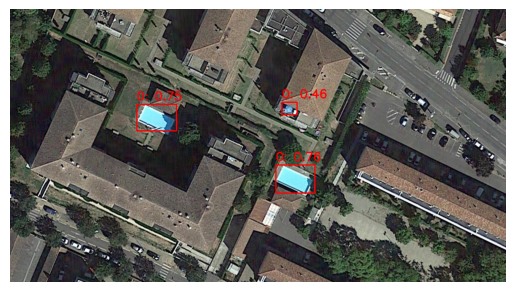

In [2]:
import cv2
import numpy as np

image_cv2 = cv2.imread(image_path)
image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)

for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        label = int(box.cls)
        confidence = float(box.conf)

# Dessiner la boîte sur l'image

        cv2.rectangle(image_cv2, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image_cv2, f'{label}: {confidence:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

plt.imshow(image_cv2)
plt.axis('off')
plt.show()